In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [2]:
input_mat = io.loadmat('/content/drive/MyDrive/Colab Notebooks/kalman_filter/11.ARS/ArsGyro.mat')

In [3]:
# 자이로를 이용한 각속도 측정
def get_gyro(i):
    """Measure angular velocity using gyro."""
    p = input_mat['wx'][i][0]  # input_mat['wx']: (41500, 1)
    q = input_mat['wy'][i][0]  # input_mat['wy']: (41500, 1)
    r = input_mat['wz'][i][0]  # input_mat['wz']: (41500, 1)
    return p, q, r

In [4]:
# 자이로로 측정한 각속도(p,q,r)를 오일러 각도의 변화율로 변환
def euler_gyro(phi, the, psi, p, q, r, dt):
    """Calculate Euler angle (Pose Orientation)."""
    sinPhi = np.sin(phi)
    cosPhi = np.cos(phi)
    cosThe = np.cos(the)
    tanThe = np.tan(the)
    phi = phi + dt * (p + q * sinPhi * tanThe + r * cosPhi * tanThe)
    the = the + dt * (q * cosPhi - r * sinPhi)
    psi = psi + dt * (q * sinPhi / cosThe + r * cosPhi / cosThe)
    return phi, the, psi

In [5]:
# Input parameters.
n_samples = 41500
dt = 0.01

In [6]:
time = np.arange(n_samples) * dt
phi_save = np.zeros(n_samples)
the_save = np.zeros(n_samples)
psi_save = np.zeros(n_samples)

In [12]:
# 각도를 라디언에서 도로 바꿔줌
# 180 * x / pi 

phi, the, psi = 0, 0, 0
for i in range(n_samples):
    p, q, r = get_gyro(i)
    phi, the, psi = euler_gyro(phi, the, psi, p, q, r, dt)
    phi_save[i] = np.rad2deg(phi)
    the_save[i] = np.rad2deg(the)
    psi_save[i] = np.rad2deg(psi)

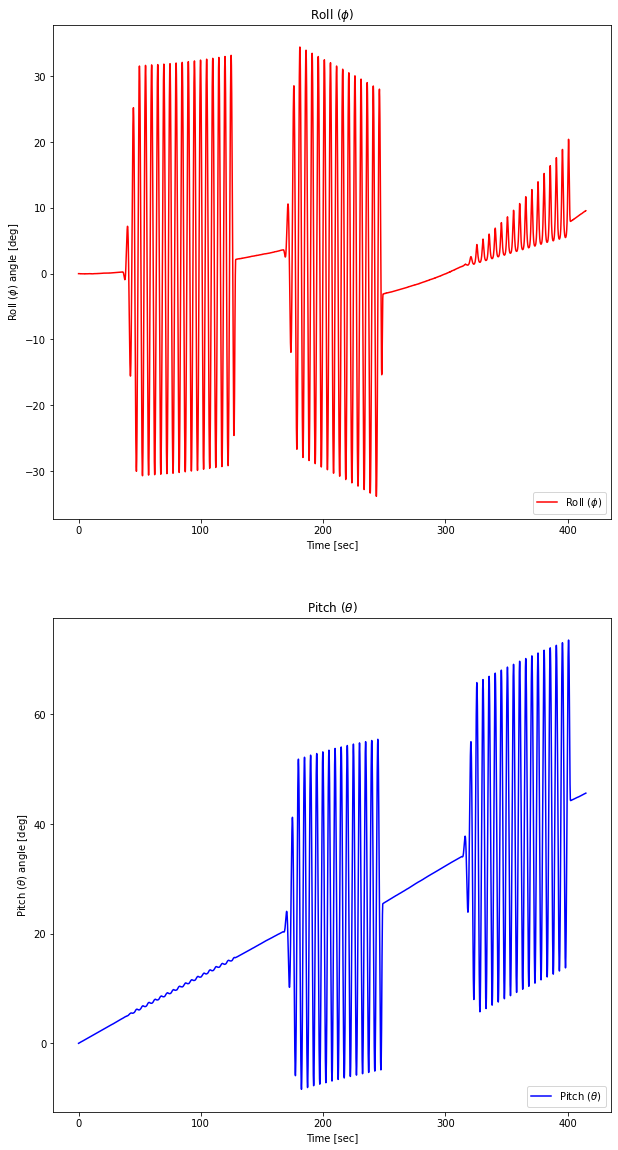

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.plot(time, phi_save, 'r', label='Roll ($\\phi$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Roll ($\\phi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Roll ($\phi$) angle [deg]')

plt.subplot(2, 1, 2)
plt.plot(time, the_save, 'b', label='Pitch ($\\theta$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Pitch ($\\theta$)')
plt.xlabel('Time [sec]')
plt.ylabel('Pitch ($\\theta$) angle [deg]')

# plt.subplot(3, 1, 3)
# plt.plot(time, psi_save, 'g', label='Yaw ($\\psi$)', markersize=0.2)
# plt.legend(loc='lower right')
# plt.title('Yaw ($\\psi$)')
# plt.xlabel('Time [sec]')
# plt.ylabel('Yaw ($\\psi$) angle [deg]')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/kalman_filter/11.ARS/pose_orientation_gyro.png')

In [10]:
 phi, the, psi = 0, 0, 0
for i in range(n_samples):
    p, q, r = get_gyro(i)
    phi, the, psi = euler_gyro(phi, the, psi, p, q, r, dt)
    phi_save[i] = phi
    the_save[i] = the
    psi_save[i] = psi

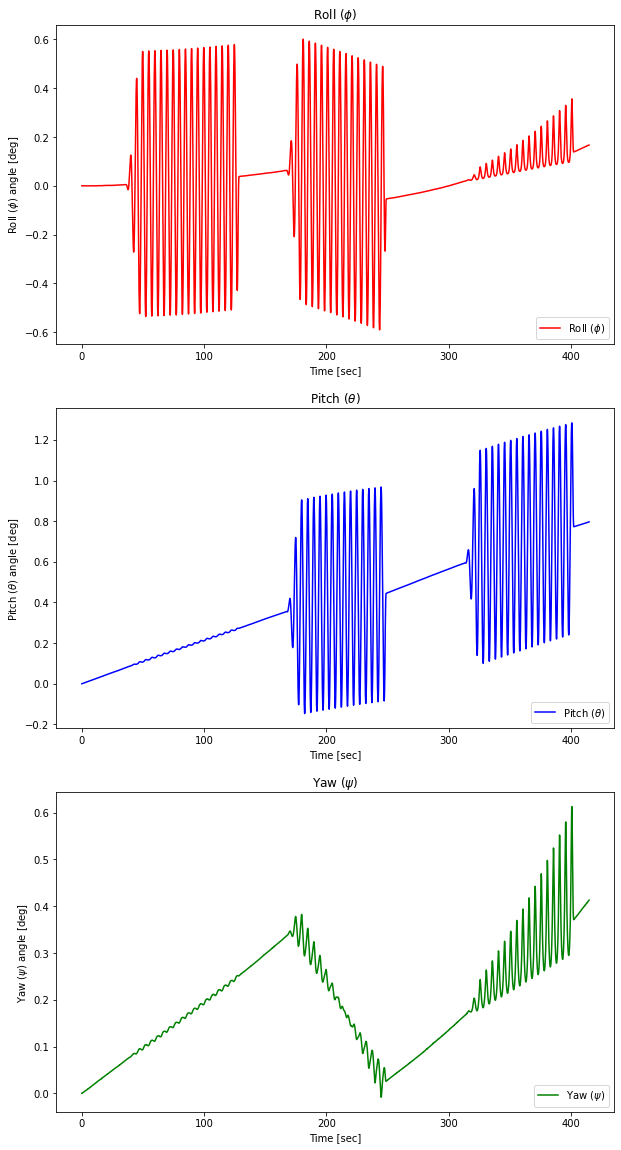

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

plt.subplot(3, 1, 1)
plt.plot(time, phi_save, 'r', label='Roll ($\\phi$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Roll ($\\phi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Roll ($\phi$) angle [deg]')

plt.subplot(3, 1, 2)
plt.plot(time, the_save, 'b', label='Pitch ($\\theta$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Pitch ($\\theta$)')
plt.xlabel('Time [sec]')
plt.ylabel('Pitch ($\\theta$) angle [deg]')

plt.subplot(3, 1, 3)
plt.plot(time, psi_save, 'g', label='Yaw ($\\psi$)', markersize=0.2)
plt.legend(loc='lower right')
plt.title('Yaw ($\\psi$)')
plt.xlabel('Time [sec]')
plt.ylabel('Yaw ($\\psi$) angle [deg]')

plt.savefig('/content/drive/MyDrive/Colab Notebooks/kalman_filter/11.ARS/pose_orientation_gyro.png')